# Datos

In [1]:
#paquetes locales diseñados para nuestro caso de estudio
from localpacks.data import get_data 

#graficos
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

### Inpeccionamos nuestros datos

In [2]:
cordoba_sf = get_data() #obtenemos nuestros datos

In [3]:
cordoba_sf.head(3)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,"POLYGON ((3686668.391348725 6672098.301358264,..."
1,336421,141470304,211.0,223.0,434.0,125.0,318.0,121.0,"POLYGON ((3651995.370083685 6492136.442240674,..."
2,336420,141470302,203.0,168.0,371.0,105.0,117.0,44.0,"POLYGON ((3646477.920536898 6501399.587313074,..."


Podemos observar que los datos corresponden a los de la descripción del **README.md**

In [4]:
cordoba_sf.describe()

,toponimo_i,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,312346.756734,337.771044,358.541246,696.312290,217.138678,259.303662,205.924453
std,12036.316427,196.816007,205.086649,398.267489,113.233837,126.846555,106.444272
min,286803.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,315082.750000,198.000000,218.000000,419.750000,145.000000,194.000000,138.000000
50%,316309.500000,334.000000,369.000000,703.000000,229.500000,269.000000,218.000000
75%,317835.250000,455.250000,489.000000,944.000000,293.000000,339.000000,277.000000
max,336422.000000,2483.000000,1622.000000,3273.000000,850.000000,1172.000000,707.000000


Vemos que no tenemos ninguna distribución normal en niguna de las features.

In [5]:
cordoba_sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 9 columns):
toponimo_i    4752 non-null int64
link          4752 non-null object
varon         4752 non-null float64
mujer         4752 non-null float64
totalpobl     4752 non-null float64
hogares       4752 non-null float64
viviendasp    4752 non-null float64
viv_part_h    4752 non-null float64
geometry      4752 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 334.2+ KB


No tenemos datos nulos y posiblemente solo debamos cambiar el tipo de dato del `link` como integer.

In [6]:
type(cordoba_sf.geometry) # vemos que tenemos un obj geopandas

geopandas.geoseries.GeoSeries

In [7]:
type(cordoba_sf.geometry[0]) #podemos observar que cada área correponde a un poligono

shapely.geometry.polygon.Polygon

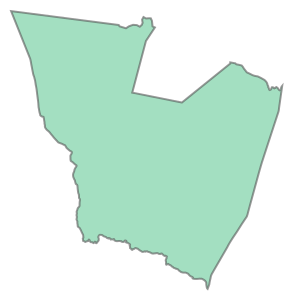

In [8]:
cordoba_sf.geometry[0] # y bodemos observar la forma individualmente

In [9]:
cordoba_sf.geometry[0].area

235938945.8042021

# Visualización de Datos

Exploraremos nuestros datos por categorias

### 1. Habitantes General

C:\Users\USUARIO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


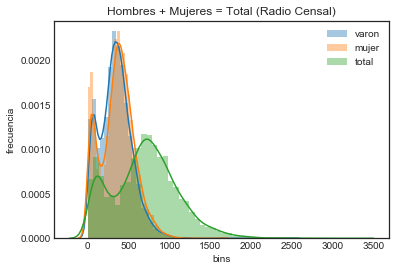

In [10]:
#Datos a plotear
sns.distplot(cordoba_sf['varon'], label='varon')
sns.distplot(cordoba_sf['mujer'], label='mujer')
sns.distplot(cordoba_sf['totalpobl'], label='total')

#anotaciones y leyendas
plt.title('Hombres + Mujeres = Total (Radio Censal)')
plt.ylabel('frecuencia')
plt.xlabel('bins')
plt.legend();

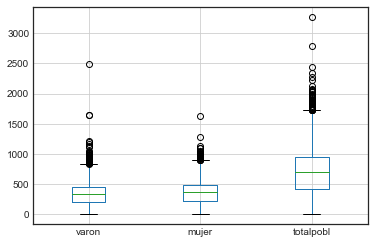

In [11]:
cordoba_sf[['varon','mujer','totalpobl']].boxplot();

Cada distribución atiende al hecho de que en cada radio zonal se presentan diferentes densidades poblacionales y  se observa un mayor grado de dispersión para la población total.

#### 1.1 Habitantes Hombres-Mujeres

C:\Users\USUARIO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


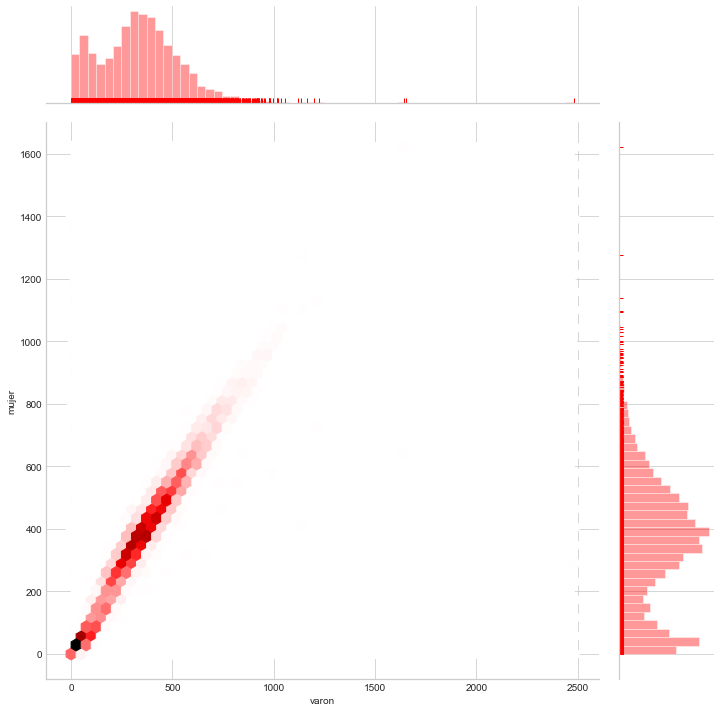

In [12]:
from scipy import stats
with sns.axes_style('whitegrid'):
    g = sns.jointplot(x='varon', y='mujer', data=cordoba_sf,  kind="hex", height=10, color="r", marginal_kws=dict(bins=60, rug=True))

Detallando un poco más la cantidades distribuidas entre hombres y mujeres, observamos que las zonas se concentran entre un rago de valores de 0-500 habitantes por radio zonal, disminuyendo a partir de este umbral y siendo solo unas pocas zonas las que tienen densidades mayores a 800 de habitantes por zonas.

### 2. Hogares

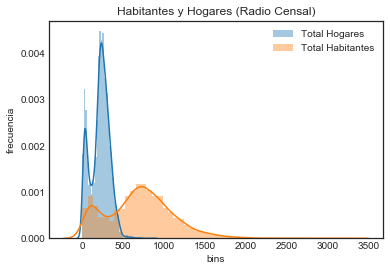

In [13]:
#Datos a plotear
sns.distplot(cordoba_sf['hogares'], label='Total Hogares')
sns.distplot(cordoba_sf['totalpobl'], label='Total Habitantes')

#anotaciones y leyendas
plt.title('Habitantes y Hogares (Radio Censal)')
plt.ylabel('frecuencia')
plt.xlabel('bins')
plt.legend();

He de esperarse que exista un mayor número de habitantes que de hogares, esto es que varias personas pueden compartir hogares.